In [1]:
# Install a package BioConductor ExperimentHub to access the example data
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
BiocManager::install("ExperimentHub")

# Install glmnet for LASSO and Elastic Net regression
install.packages("glmnet")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11 ucrt)

Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.5.0/library
  packages:
    lattice, mgcv

Old packages: 'data.table', 'generics', 'recipes', 'zip'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ExperimentHub'"
Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.5.0/library
  packages:
    la

package 'glmnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glmnet'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\dasha\AppData\Local\R\win-library\4.5\00LOCK\glmnet\libs\x64\glmnet.dll to C:\Users\dasha\AppData\Local\R\win-library\4.5\glmnet\libs\x64\glmnet.dll: Permission denied"
Warning message:
"restored 'glmnet'"



The downloaded binary packages are in
	C:\Users\dasha\AppData\Local\Temp\RtmpKslGMX\downloaded_packages


In [2]:
library("BiocManager")
library("ExperimentHub")
library("glmnet")

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: 'generics'


The following objects are masked from 'package:base':

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Loading required package: AnnotationHub

Loading required package: BiocFileCache

Loading required package: dbplyr

Loading required package: Matrix

Loaded glmnet 4.1-8



# Problem 9: Microbiome data

Download this dataset from BioConductor.

In [3]:
eh = ExperimentHub()
data = eh[["EH361"]]

curatedMetagenomicData not installed.
  Full functionality, documentation, and loading of data might not be possible without installing

loading from cache

require("Biobase")



In this dataset, for each of $N_{\textrm{obs}}$ patients, the presence of $N_{\textrm{dim}}$ species of microbe was measured.
In addition, the disease state of the patient was measured, which can be "n" (no cancer), "adenoma" (precancerous), or "cancer".
For simplicity, let's only use the "n" and "cancer" states (and remove the adenomas).

In [4]:
#colnames(data)
#rownames(data)
ncol(data)
nrow(data)

#data$disease
dataCancerNoCancer = data[, data$disease %in% c("n", "cancer")]
dataCancerNoCancer$disease

ncol(dataCancerNoCancer)
nrow(dataCancerNoCancer)

Samples 
    156

Features 
    1505

[1] "n"      "n"      "n"      "cancer" "n"      "n"      "n"      "n"     
  [9] "cancer" "n"      "n"      "n"      "n"      "n"      "cancer" "n"     
 [17] "n"      "n"      "cancer" "cancer" "n"      "cancer" "cancer" "n"     
 [25] "n"      "n"      "n"      "cancer" "n"      "n"      "cancer" "cancer"
 [33] "cancer" "n"      "cancer" "n"      "n"      "n"      "n"      "n"     
 [41] "cancer" "cancer" "n"      "cancer" "n"      "n"      "cancer" "cancer"
 [49] "cancer" "cancer" "cancer" "n"      "n"      "cancer" "n"      "n"     
 [57] "cancer" "cancer" "cancer" "n"      "cancer" "n"      "cancer" "n"     
 [65] "n"      "cancer" "cancer" "cancer" "cancer" "cancer" "cancer" "cancer"
 [73] "cancer" "cancer" "n"      "n"      "n"      "n"      "n"      "cancer"
 [81] "cancer" "n"      "cancer" "n"      "cancer" "cancer" "n"      "cancer"
 [89] "n"      "n"      "n"      "cancer" "cancer" "n"      "n"      "cancer"
 [97] "cancer" "cancer" "cancer" "cancer" "cancer" "cancer" "n"      "n"     
[105] "n"      "cancer" "n"      "n"      "n"      "n"      "n"      "n"     
[113] "cancer" "cancer"

Samples 
    114

Features 
    1505

## Question i

Inspect the data.

How many patients are there ($N_{\textrm{obs}}$)?

How many species of microbe were measured ($N_{\textrm{dim}}$)?


# Answer i
- There are 114 patients, that is, $N_{\text{obs}}$ = 114.
- There are 1505 patients, that is, $N_{\text{dim}}$ = 1505.

## Question ii

In generalized linear regression (glm) model, the probability that a patient has cancer, given the presence of microbes $X_1,... X_{N-\textrm{dim}}$ is

$p = \frac{\operatorname{exp} (\beta_1 X_1 + ... )}{1+\operatorname{exp}\left( \beta_1 X_1 + ... \right)}$.

This model has a likelihood function $L(\beta_1, ... \beta, Y_1,...)$ you can see [here](https://en.wikipedia.org/wiki/Generalized_linear_model). 
Simply using the maximum likelihood approach is impossible here, since $N_{\textrm{dim}}>N_{\textrm{obs}}$. 

On the other hand, LASSO regression maximizes $L + \lambda \sum_i^n | \beta |$.

Perform LASSO regression for a sweep over $\lambda$.
Plot the value of all the parameters $\beta_i$ versus $\lambda$.


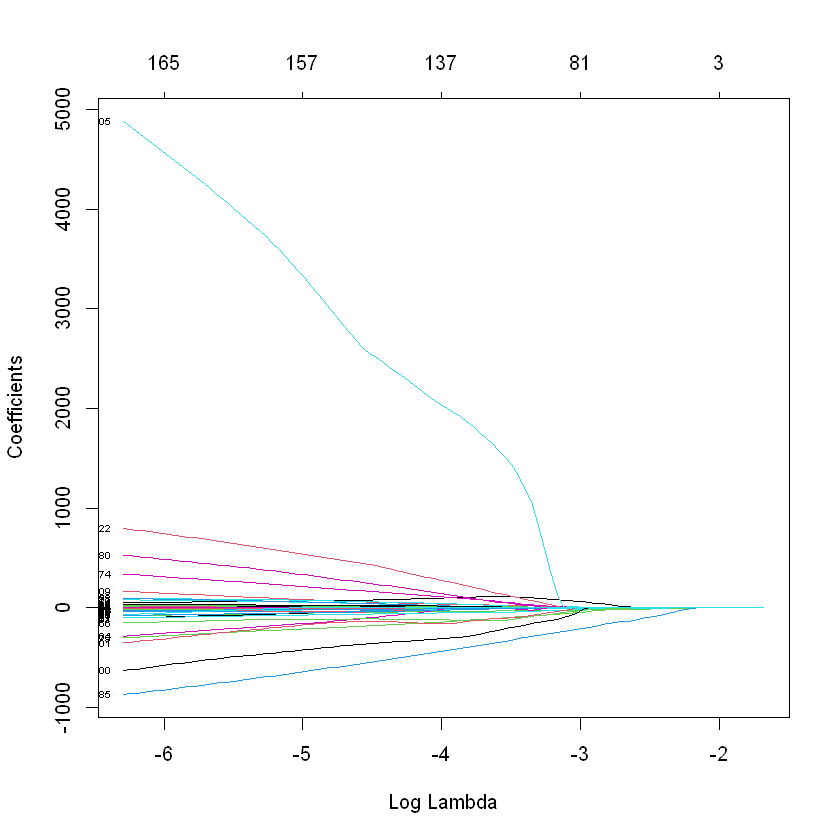

In [5]:
y = factor(dataCancerNoCancer$disease)
x = t(exprs(dataCancerNoCancer))

lassoFit = glmnet(y=y, x=x, family="binomial")

par(bg = "white")
plot(lassoFit, xvar = "lambda", label = TRUE)

Perform cross-validation for each value of $\lambda$.
What value of $\lambda$ minimizes the cross-validation error?

Best Lambda: 0.06680157 


               
confusionMatrix cancer  n
         cancer     41  3
         n          12 58

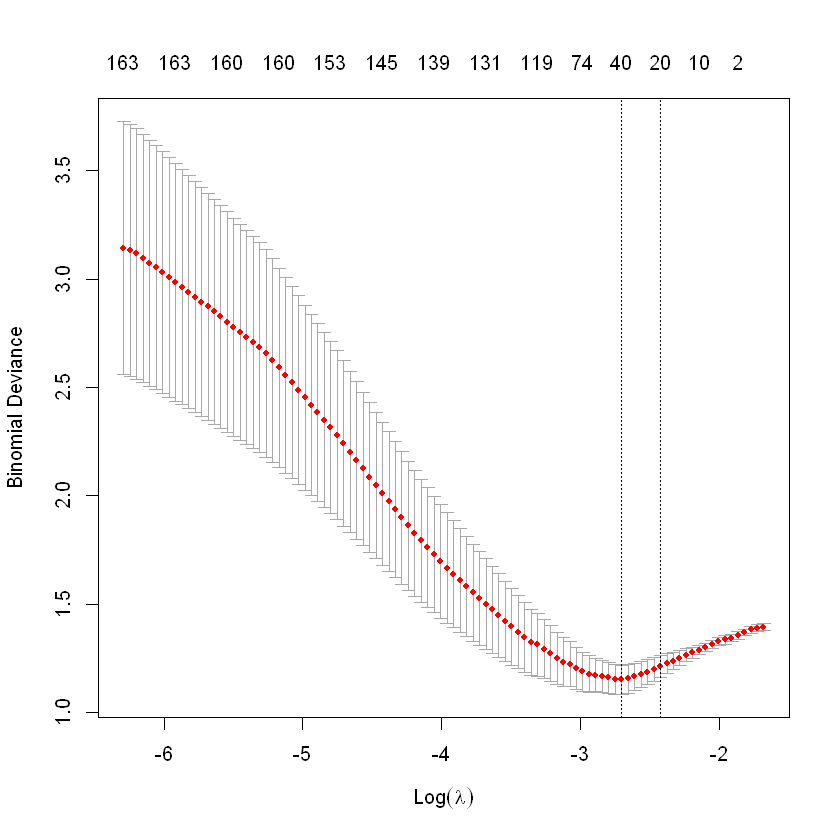

In [7]:
crossValidationOutput <- cv.glmnet(y=factor(dataCancerNoCancer$disease),
                                   x=t(exprs(dataCancerNoCancer)), family="binomial")
par(bg = "white")
plot(crossValidationOutput)

bestLambda = crossValidationOutput$lambda.min
cat("Best Lambda:", bestLambda, "\n")
confusionMatrix = predict(lassoFit, newx = t(exprs(dataCancerNoCancer)), type="class",s=bestLambda)
table(confusionMatrix, dataCancerNoCancer$disease)

## 3.  Elastic Net regression

The characteristic feature of Ridge regression is the penalty

$$\mathrm{log}\left(L(\beta)\right) - \lambda \sum_i  \beta_i ^2,$$

while the penalty for Lasso regression is

$$\mathrm{log}\left(L(\beta)\right) - \lambda \sum_i | \beta_i |.$$

In this Problem Set, we explore the penalty

$$\mathrm{log}\left(L(\beta)\right) - \lambda \left(\alpha \sum_i | \beta_i | +  (1-\alpha) \sum_i  \beta_i ^2\right),$$

which is called __Elastic Net__.  

i) In parameter space, Ridge Regression corresponds to finding optimal parameters on a circle, while LASSO regression corresponds to finding optimal parameters on a diamond. What shape does Elastic Net correspond to?

Warning message in geom_contour(aes(z = elastic_net, fill = ..level..), bins = 20, :
"Ignoring unknown aesthetics: fill"


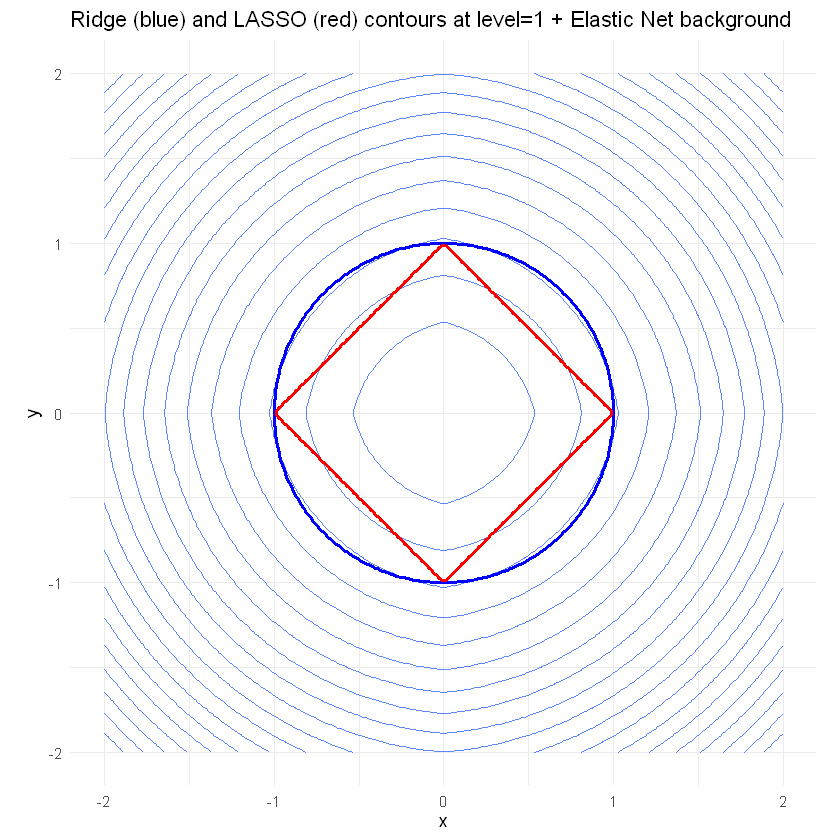

In [10]:
library(ggplot2)
library(reshape2)

# Grid for x and y
x <- seq(-2, 2, length = 200)
y <- seq(-2, 2, length = 200)
grid <- expand.grid(x = x, y = y)

lambda <- 1
alpha <- 0.5

# Ridge: x^2 + y^2
grid$ridge <- with(grid, x^2 + y^2)

# LASSO: |x| + |y|
grid$lasso <- with(grid, abs(x) + abs(y))

# Elastic Net penalized log-likelihood
# Shift logL center to (0,0) for easy comparison
logL <- with(grid, - (x^2 + y^2))
penalty <- with(grid, lambda * (alpha * (abs(x) + abs(y)) + (1 - alpha) * (x^2 + y^2)))
grid$elastic_net <- logL - penalty

# Melt data for Ridge and LASSO contours
contour_data <- melt(grid, id.vars = c("x", "y"), measure.vars = c("ridge", "lasso"))

# Plot
ggplot(grid, aes(x, y)) +
  geom_contour(aes(z = elastic_net, fill = ..level..), bins = 20, alpha = 0.8) +  # Elastic Net background
  scale_fill_viridis_c(option = "C") +
  geom_contour(data = subset(contour_data, variable == "ridge"),
               aes(z = value), color = "blue", size = 1,
               breaks = c(1)) +  # Ridge: single contour at level = 1
  geom_contour(data = subset(contour_data, variable == "lasso"),
               aes(z = value), color = "red", size = 1,
               breaks = c(1)) +   # LASSO: single contour at level = 1
  coord_fixed() +
  labs(title = "Ridge (blue) and LASSO (red) contours at level=1 + Elastic Net background",
       fill = "Elastic Net\nobjective") +
  theme_minimal()


ii). The `glmnet` package was built for Elastic Net regression. Look up the [glmnet package help files](https://www.rdocumentation.org/packages/glmnet/versions/3.0-2/topics/glmnet) to find out how to perform Elastic Net regression for a specific $\alpha$. Do this for $\alpha=0.5$, and return the confusion matrix.

In [ ]:
# CODE HERE

iii) Perform a sweep over $\alpha=0$ to $\alpha=1$. Plot the number of species included versus $\alpha$.

Hint: The cv.glmnet output object has a returns a value `$nzero`, which is the number of nonzero factorso, which is the number of species desired.  

In [ ]:
# CODE HERE

iv) What $\alpha$ value minimizes the number of false positives (non-cancer patients that are predicted to have cancer)? What $\alpha$ value minimizes the number of false negatives (cancer patients that are predicted to not have cancer)?


In [ ]:
# CODE HERE